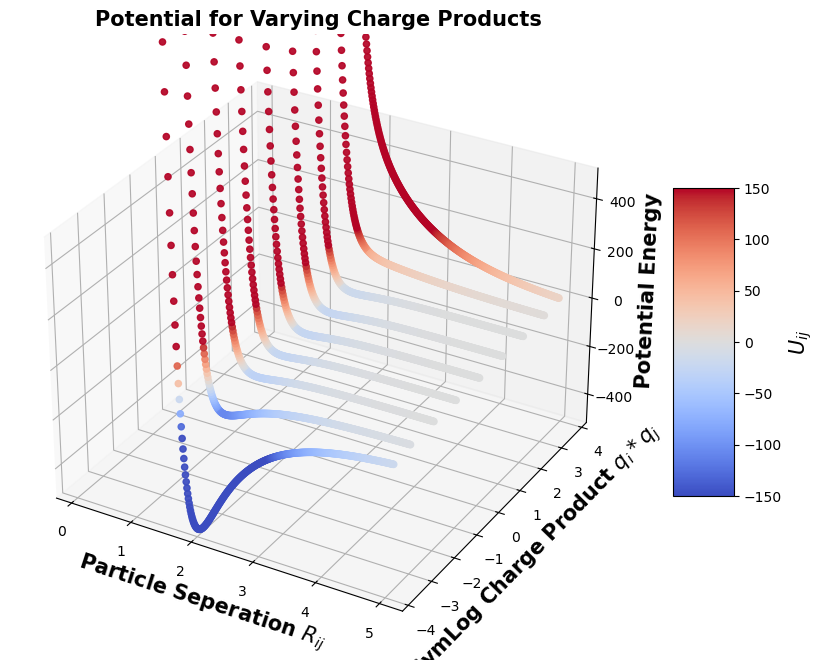

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Increase the font size and bold the text for titles and axis labels globally
plt.rcParams.update({
    'axes.titlesize': 15,  # Increase the font size of the title
    'axes.titleweight': 'bold',  # Bold the title font
    'axes.labelsize': 15,  # Increase the font size of the axis labels
    'axes.labelweight': 'bold',  # Bold the axis label font
    'grid.alpha': 0.5,  # Set grid line transparency
    'legend.fontsize': 12  # Set the legend font size
})

# Constants
ri, rj, qi, qj = 1, 1, 1, 1
S = ri + rj
Q = qi * qj
u, k = 25, 0.8
s = S

# Function definition for Y_same with Q as a parameter
def Y_same(X, Q):
    return (Q * np.exp(-k * X) / X) + 4 * u * ((s / X) ** 12 - (s / X) ** 6)

# Generate X values
X = np.linspace(0.1, 5, 500)

# Generate Q values directly, and transform Q_values using a simple linear mapping in this context
Q_values = np.array([-5000,-1000,-100,-10,0,10,100,1000,5000])  # Adjusted for demonstration

# Assuming a direct approach to transform Q to SymLogQ for this specific range
SymLogQ = np.sign(Q_values) * np.log10(np.abs(Q_values) + 1)

# Create a meshgrid for X and SymLogQ
X, SymLogQ_grid = np.meshgrid(X, SymLogQ)

# Calculate Z using the modified Y_same function
Z = Y_same(X, Q_values.reshape(-1, 1))

# Create the 3D plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plotting points instead of a surface
points = ax.scatter(X.ravel(), SymLogQ_grid.ravel(), Z.ravel(), c=Z.ravel(), cmap='coolwarm', vmin=-150, vmax=150)

# Labels and title
ax.set_xlabel('Particle Seperation $R_{ij}$ ')
ax.set_ylabel('SymLog Charge Product $q_i*q_j$')
ax.set_zlabel('Potential Energy')
ax.set_title('Potential for Varying Charge Products')


# Setting Z axis limits
ax.set_zlim(-500, 500)

# Add a color bar to indicate the potential values, ensuring Z=0 aligns with white
cbar = fig.colorbar(points, shrink=0.5, aspect=5)
cbar.set_label('$U_{ij}$')

# Display the plot
plt.savefig(('ChargeProdPlot.svg'))
plt.show()


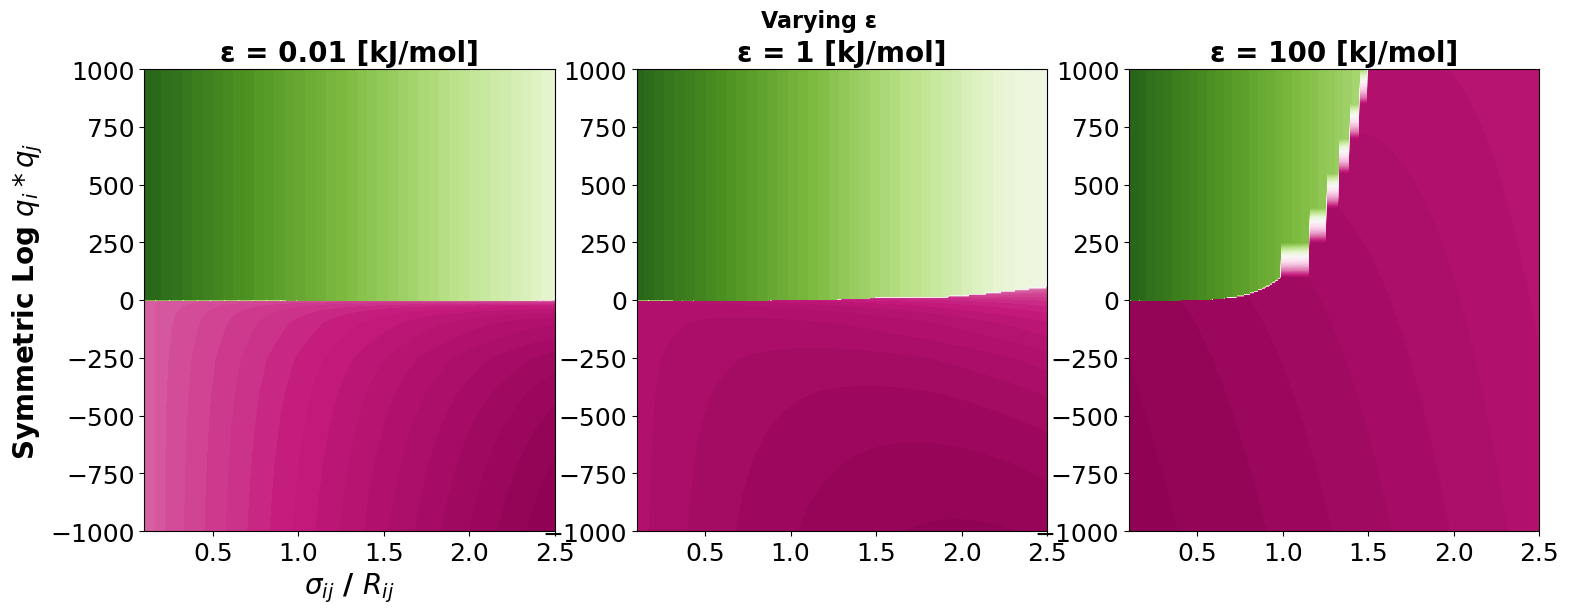

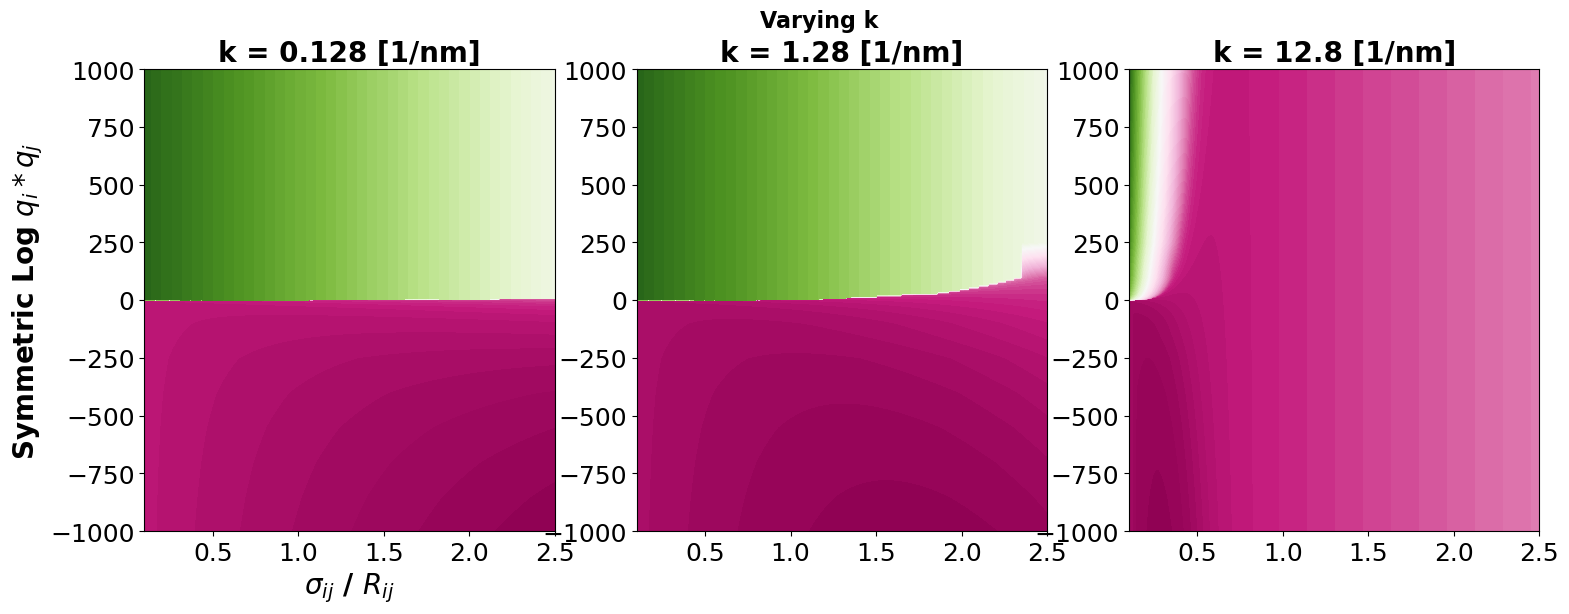

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar

# Increase the font size and bold the text for titles and axis labels globally
plt.rcParams.update({
    'axes.titlesize': 20,  # Increase the font size of the title
    'axes.titleweight': 'bold',  # Bold the title font
    'axes.labelsize': 20,  # Increase the font size of the axis labels
    'axes.labelweight': 'bold',  # Bold the axis label font
    'xtick.labelsize': 18,       # Increase the font size of x-axis tick marks
    'ytick.labelsize': 18,       # Increase the font size of y-axis tick marks
    'grid.alpha': 0.5,  # Set grid line transparency
    'legend.fontsize': 12  # Set the legend font size
})

def potential(x, u, qi_qj_ratio, k, s):
    screened_coulomb = (qi_qj_ratio * np.exp(-k * x)) / x
    lennard_jones = 4 * u * ((s / x)**12 - (s / x)**6)
    return screened_coulomb + lennard_jones

def find_potential_minimum(u, qi_qj_ratio, k, s):
    result = minimize_scalar(potential, bounds=(0.1, 5), args=(u, qi_qj_ratio, k, s), method='bounded')
    return result.x
    
def generate_corrected_plots(u_values, k_values, S_values, qi_qj_ratios):
    fig_eps, axs_eps = plt.subplots(1, 3, figsize=(18, 6))
    fig_eps.suptitle('Varying ε', fontsize=16, fontweight='bold')
    fig_k, axs_k = plt.subplots(1, 3, figsize=(18, 6))
    fig_k.suptitle('Varying k', fontsize=16, fontweight='bold')
    S_mesh, Q_mesh = np.meshgrid(S_values, qi_qj_ratios)
    
    for ax_idx, (ax, u) in enumerate(zip(axs_eps, u_values)):
        X_min_diff = np.array([[find_potential_minimum(u, Q_mesh[i, j], 1.0, S_mesh[i, j]) - S_mesh[i, j] for j in range(len(S_values))] for i in range(len(qi_qj_ratios))])
        ax.contourf(S_mesh, Q_mesh, X_min_diff, levels=100, cmap='PiYG')
        ax.set_title(f'ε = {u} [kJ/mol]')
        if ax_idx == 0:  # Apply labels only to the bottom left subplot
            ax.set_xlabel('$\sigma_{ij}$ / $R_{ij}$ ')
            ax.set_ylabel('Symmetric Log $q_i*q_j$')
    
    for ax_idx, (ax, k) in enumerate(zip(axs_k, k_values)):
        X_min_diff = np.array([[find_potential_minimum(1.0, Q_mesh[i, j], k, S_mesh[i, j]) - S_mesh[i, j] for j in range(len(S_values))] for i in range(len(qi_qj_ratios))])
        ax.contourf(S_mesh, Q_mesh, X_min_diff, levels=100, cmap='PiYG')
        ax.set_title(f'k = {k} [1/nm]')
        if ax_idx == 0:  # Apply labels only to the bottom left subplot
            ax.set_xlabel('$\sigma_{ij}$ / $R_{ij}$ ')
            ax.set_ylabel('Symmetric Log $q_i*q_j$')

    fig_eps.savefig('varying_epsilon.svg', format='svg')
    fig_k.savefig('varying_k.svg', format='svg')
    plt.show()

S_values = np.linspace(0.1, 2.5, 500)
#qi_qj_ratios = np.array([-1E6, -1E5, -1E4, -1E3, -100, -50, -10, -5, -1, -0.5, 0, 0.5, 1, 5, 10, 50, 100, 1E3, 1E4, 1E5, 1E6])
qi_qj_ratios = np.array([-1.00000000e+03, -8.50000000e+02, -7.00000000e+02, -5.50000000e+02,
                         -4.00000000e+02, -2.50000000e+02, -1.00000000e+02, -9.16666667e+01,
                         -8.33333333e+01, -7.50000000e+01, -6.66666667e+01, -5.83333333e+01,
                         -5.00000000e+01, -4.33333333e+01, -3.66666667e+01, -3.00000000e+01,
                         -2.33333333e+01, -1.66666667e+01, -1.00000000e+01, -9.16666667e+00,
                         -8.33333333e+00, -7.50000000e+00, -6.66666667e+00, -5.83333333e+00,
                         -5.00000000e+00, -4.33333333e+00, -3.66666667e+00, -3.00000000e+00,
                         -2.33333333e+00, -1.66666667e+00, -1.00000000e+00, -9.16666667e-01,
                         -8.33333333e-01, -7.50000000e-01, -6.66666667e-01, -5.83333333e-01,
                         -5.00000000e-01, -4.16666667e-01, -3.33333333e-01, -2.50000000e-01,
                         -1.66666667e-01, -8.33333333e-02,  0.00000000e+00,  8.33333333e-02,
                          1.66666667e-01,  2.50000000e-01,  3.33333333e-01,  4.16666667e-01,
                          5.00000000e-01,  5.83333333e-01,  6.66666667e-01,  7.50000000e-01,
                          8.33333333e-01,  9.16666667e-01,  1.00000000e+00,  1.66666667e+00,
                          2.33333333e+00,  3.00000000e+00,  3.66666667e+00,  4.33333333e+00,
                          5.00000000e+00,  5.83333333e+00,  6.66666667e+00,  7.50000000e+00,
                          8.33333333e+00,  9.16666667e+00,  1.00000000e+01,  1.66666667e+01,
                          2.33333333e+01,  3.00000000e+01,  3.66666667e+01,  4.33333333e+01,
                          5.00000000e+01,  5.83333333e+01,  6.66666667e+01,  7.50000000e+01,
                          8.33333333e+01,  9.16666667e+01,  1.00000000e+02,  2.50000000e+02,
                          4.00000000e+02,  5.50000000e+02,  7.00000000e+02,  8.50000000e+02,
                          1.00000000e+03]) 


u_values = [0.01, 1, 100]
k_values = [0.128, 1.28, 12.8]

generate_corrected_plots(u_values, k_values, S_values, qi_qj_ratios)



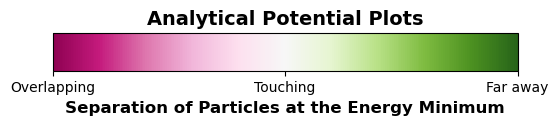

In [9]:

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib.colorbar import ColorbarBase

# Increase the font size and bold the text for titles and axis labels globally
plt.rcParams.update({
    'axes.titlesize': 14,  # Increase the font size of the title
    'axes.titleweight': 'bold',  # Bold the title font
    'axes.labelsize': 12,  # Increase the font size of the axis labels
    'axes.labelweight': 'bold',  # Bold the axis label font
    'grid.alpha': 0.5,  # Set grid line transparency
    'legend.fontsize': 10  # Set the legend font size
})

# Define the colormap
cmap = plt.cm.PiYG

# Define normalization from values to colors
norm = Normalize(vmin=-1, vmax=1)

fig, ax = plt.subplots(figsize=(6, 1))
ax.set_title(f'Analytical Potential Plots')
fig.subplots_adjust(bottom=0.5)

# Create a colorbar with custom tick locations and labels
cbar = ColorbarBase(ax, cmap=cmap,
                    norm=norm,
                    orientation='horizontal')

# Set custom ticks and labels
cbar.set_ticks([-1, 0, 1])
cbar.set_ticklabels(['Overlapping', 'Touching', 'Far away'])

cbar.set_label('Separation of Particles at the Energy Minimum')

plt.savefig('scale.svg', format='svg'); 
plt.show()



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar

# Increase the font size and bold the text for titles and axis labels globally
plt.rcParams.update({
    'axes.titlesize': 15,  # Increase the font size of the title
    'axes.titleweight': 'bold',  # Bold the title font
    'axes.labelsize': 15,  # Increase the font size of the axis labels
    'axes.labelweight': 'bold',  # Bold the axis label font
    'grid.alpha': 0.5,  # Set grid line transparency
    'legend.fontsize': 12  # Set the legend font size
})

def potential(x, u, qi_qj_ratio, k, s):
    screened_coulomb = (qi_qj_ratio * np.exp(-k * x)) / x
    lennard_jones = 4 * u * ((s / x)**12 - (s / x)**6)
    return screened_coulomb + lennard_jones

def find_potential_minimum(u, qi_qj_ratio, k, s):
    result = minimize_scalar(potential, bounds=(0.1, 5), args=(u, qi_qj_ratio, k, s), method='bounded')
    return result.x

def generate_corrected_plots(u_values, k_values, S_values, qi_qj_ratios):
    fig_eps, axs_eps = plt.subplots(1, 3, figsize=(18, 6))
    fig_eps.suptitle('Varying ε', fontsize=16, fontweight='bold')
    fig_k, axs_k = plt.subplots(1, 3, figsize=(18, 6))
    fig_k.suptitle('Varying k', fontsize=16, fontweight='bold')
    S_mesh, Q_mesh = np.meshgrid(S_values, qi_qj_ratios)
    
    for ax_idx, (ax, u) in enumerate(zip(axs_eps, u_values)):
        X_min_diff = np.array([[find_potential_minimum(u, Q_mesh[i, j], 1.0, S_mesh[i, j] - S_values[j]) / S_values[j] for j in range(len(S_values))] for i in range(len(qi_qj_ratios))])
        ax.contourf(S_mesh, Q_mesh, X_min_diff, levels=100, cmap='PiYG')
        ax.set_title(f'ε = {u} [kJ/mol]')
        if ax_idx == 0:  # Apply labels only to the bottom left subplot
            ax.set_xlabel('$r_i/r_j$')
            ax.set_ylabel('Symmetric Log $q_i*q_j$')
    
    for ax_idx, (ax, k) in enumerate(zip(axs_k, k_values)):
        X_min_diff = np.array([[find_potential_minimum(1.0, Q_mesh[i, j], k, S_mesh[i, j] - S_values[j]) / S_values[j] for j in range(len(S_values))] for i in range(len(qi_qj_ratios))])
        ax.contourf(S_mesh, Q_mesh, X_min_diff, levels=100, cmap='PiYG')
        ax.set_title(f'k = {k} [1/nm]')
        if ax_idx == 0:  # Apply labels only to the bottom left subplot
            ax.set_xlabel('$r_i/r_j$')
            ax.set_ylabel('Symmetric Log $q_i*q_j$')

    fig_eps.savefig('varying_epsilon.svg', format='svg')
    fig_k.savefig('varying_k.svg', format='svg')
    plt.show()

S_values = np.linspace(0.1, 2.5, 500)
#qi_qj_ratios = np.array([-1E6, -1E5, -1E4, -1E3, -100, -50, -10, -5, -1, -0.5, 0, 0.5, 1, 5, 10, 50, 100, 1E3, 1E4, 1E5, 1E6])
qi_qj_ratios = np.array([-1.00000000e+03, -8.50000000e+02, -7.00000000e+02, -5.50000000e+02,
                         -4.00000000e+02, -2.50000000e+02, -1.00000000e+02, -9.16666667e+01,
                         -8.33333333e+01, -7.50000000e+01, -6.66666667e+01, -5.83333333e+01,
                         -5.00000000e+01, -4.33333333e+01, -3.66666667e+01, -3.00000000e+01,
                         -2.33333333e+01, -1.66666667e+01, -1.00000000e+01, -9.16666667e+00,
                         -8.33333333e+00, -7.50000000e+00, -6.66666667e+00, -5.83333333e+00,
                         -5.00000000e+00, -4.33333333e+00, -3.66666667e+00, -3.00000000e+00,
                         -2.33333333e+00, -1.66666667e+00, -1.00000000e+00, -9.16666667e-01,
                         -8.33333333e-01, -7.50000000e-01, -6.66666667e-01, -5.83333333e-01,
                         -5.00000000e-01, -4.16666667e-01, -3.33333333e-01, -2.50000000e-01,
                         -1.66666667e-01, -8.33333333e-02,  0.00000000e+00,  8.33333333e-02,
                          1.66666667e-01,  2.50000000e-01,  3.33333333e-01,  4.16666667e-01,
                          5.00000000e-01,  5.83333333e-01,  6.66666667e-01,  7.50000000e-01,
                          8.33333333e-01,  9.16666667e-01,  1.00000000e+00,  1.66666667e+00,
                          2.33333333e+00,  3.00000000e+00,  3.66666667e+00,  4.33333333e+00,
                          5.00000000e+00,  5.83333333e+00,  6.66666667e+00,  7.50000000e+00,
                          8.33333333e+00,  9.16666667e+00,  1.00000000e+01,  1.66666667e+01,
                          2.33333333e+01,  3.00000000e+01,  3.66666667e+01,  4.33333333e+01,
                          5.00000000e+01,  5.83333333e+01,  6.66666667e+01,  7.50000000e+01,
                          8.33333333e+01,  9.16666667e+01,  1.00000000e+02,  2.50000000e+02,
                          4.00000000e+02,  5.50000000e+02,  7.00000000e+02,  8.50000000e+02,
                          1.00000000e+03]) 


u_values = [0.01, 1, 100]
k_values = [0.128, 1.28, 12.8]

generate_corrected_plots(u_values, k_values, S_values, qi_qj_ratios)
